In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')
#print(train_data)
le = preprocessing.LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data.Sex)
test_data['Sex'] = le.transform(test_data.Sex)

train_data = train_data.dropna(subset=['Age'])
test_data = test_data.dropna(subset=['Age', 'Fare'])
train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))
#train_data.Sex = le.transform(train_data.Sex)
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data =  test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
#train_data.head()
df1 = test_data[test_data.isna().any(axis=1)]
train_data.head()
#Male is 1, Female is 0
#test_data.head()
#train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [3]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [4]:
cm = sns.light_palette("green", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189,-0.174692
Pclass,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182,0.234857
Sex,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994,0.102239
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329,0.030121
Parch,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119,0.009197
Fare,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000,-0.277620
Embarked,-0.174692,0.234857,0.102239,-0.025252,0.030121,0.009197,-0.277620,1.000000


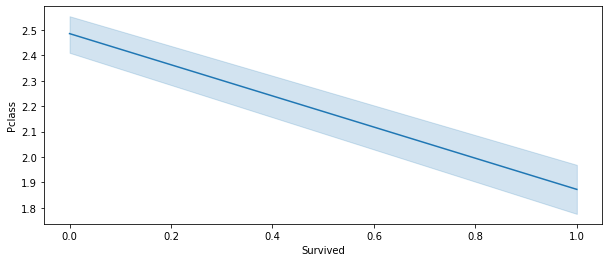

In [5]:
plt.figure(figsize=(10,4))
sns.lineplot(train_data.Survived, train_data.Pclass)

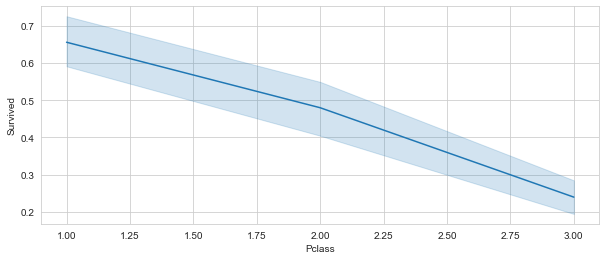

In [6]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.lineplot(train_data.Pclass, train_data.Survived)

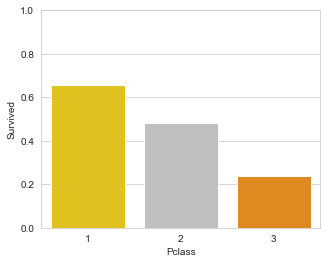

In [7]:
plt.figure(figsize=(5,4))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(train_data.Pclass, train_data.Survived, palette=["gold", "silver", "darkorange"], ci=None)
#sns.lineplot(train_data.Pclass, train_data.Survived)

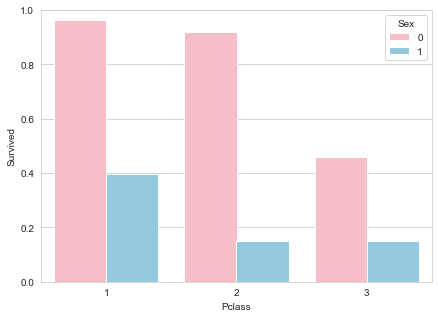

In [8]:
plt.figure(figsize=(7,5))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex, palette=["lightpink", "skyblue"], ci=None)


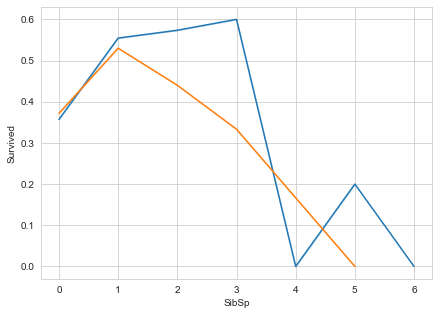

In [9]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.lineplot(x=train_data.Parch,y=train_data.Survived, ci=0)
sns.lineplot(x=train_data.SibSp,y=train_data.Survived, ci=0)

In [10]:
df1 = train_data.Survived
train_data = train_data.drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(train_data, df1, test_size=0.25, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
prediction = knn.predict(test_data)
print(prediction)

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0]


In [12]:
print(knn.score(X_test, y_test))

0.6815642458100558


In [13]:
test_data.shape

(331, 7)

In [14]:
print(knn.score(X_test, y_test))

0.6815642458100558


In [15]:
test_data.shape

(331, 7)